**Locally Weighted Linear Regression**


2a.Implement a locally weighted linear regression learner to solve the best fit problem for 1 dimensional data.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

In [6]:

# weight caliculation for the modified error fucntion
def calicualte_weightmatrix(test_point, x_values, scalingfactor):
  weight_matrix = np.mat(np.eye(x_values.shape[0]))
  for i in range(x_values.shape[0]):
    xi = x_values[i]
    weight_matrix[i, i] = np.exp(np.dot((xi-test_point), (xi-test_point).T)/(-2 * scalingfactor * scalingfactor))
  return weight_matrix

In [7]:
# predicting function by using locally weighted regression
def predict(x_values, Y, test_point, scalingfactor):
  ones_matrix = np.ones((x_values.shape[0], 1))
  x = np.hstack((x_values, ones_matrix))
  qx = np.mat([test_point, 1])
  W = calicualte_weightmatrix(qx, x, scalingfactor)
  theta = (x.T*(W * x)).I *(x.T*(W * Y))
  pred = np.dot(qx, theta)
  return pred

          x          y
0   -2.6815   1.787894
1   -1.3655   0.766491
2    0.0165   9.733846
3   -1.2805   1.276360
4   -0.8945   1.966131
..      ...        ...
118  0.1500  11.280950
119  1.6220   3.669695
120  0.0970  11.213862
121  0.6725  -0.265877
122  0.8280   1.238717

[123 rows x 2 columns]


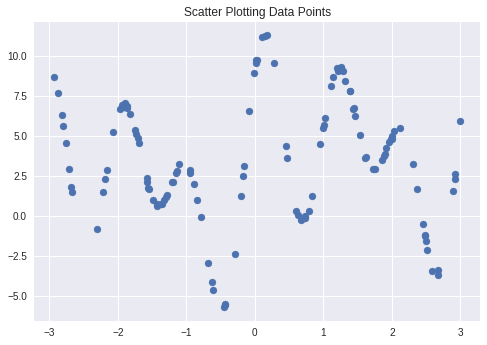

In [8]:
df = pd.read_csv('sample_data/1b.csv')
print(df)
X =  [[i] for i in df.x.values]
X=pd.DataFrame(X).values
Y =  [[i] for i in df.y.values]
Y = pd.DataFrame(Y).values
plt.title("Scatter Plotting Data Points")
plt.scatter(X, Y)

 **b) Apply your locally weighted linear regression learner to the data set that was generated for Question 1b) and plot the resulting function together with the data points (using your favorite plotting
program, e.g. Matlab, Octave, ...)**

The below plot is plotted with locally weighted regression w.r.t train data predictions  of 1b

X & Original Y value [(-2.6815, 1.787894169), (-1.3655, 0.766491139), (0.0165, 9.733846149), (-1.2805, 1.276360078), (-0.8945, 1.966131296), (-1.141, 2.832099578), (1.7205, 2.915129924), (-1.971, 6.715732388), (-2.7995, 5.620945532), (-1.1015, 3.263186634), (-2.6765, 1.517479428), (1.2365, 9.185758299), (-1.5585, 1.770106652), (2.366, 1.688940152), (2.5125, -2.155143081), (0.736, -0.001686006), (0.605, 0.276822875), (0.9545, 4.50411266), (-2.871, 7.659548548), (-1.942, 6.909927338), (-1.907, 6.823417094), (-1.5705, 2.110967858), (1.8785, 3.724626345), (-1.749, 5.389867753), (1.999, 4.836827917), (2.482, -1.203861844), (1.447, 6.731073788), (-1.3285, 0.967367651), (2.996, 5.922828221), (1.259, 9.297513484), (-0.1725, 2.496925859), (1.021, 6.100370207), (2.6685, -3.71092622), (-2.308, -0.800114589), (-1.201, 2.122510083), (2.113, 5.522823005), (1.606, 3.646615864), (-1.8655, 6.724727758), (1.4355, 6.67589015), (2.4915, -1.555376195), (-0.955, 2.850882766), (-0.199, 1.244411472), (0.0275,

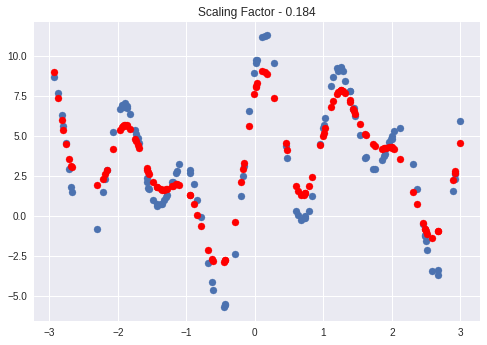

In [9]:
scalingfactor = 0.184
X_test=pd.read_csv('sample_data/1b.csv')
X_test=X_test.x.values
Y_test = []
for point in X_test:
  pred = predict(X, Y, point, scalingfactor)
  Y_test.append(pred[0][0])
plt.title(f'Scaling Factor - {scalingfactor}')
plt.scatter(X, Y)
plt.scatter(X_test, Y_test, color ='red')
predicted_values= []
original_values=[]
# print(X)
for i in range(X_test.shape[0]):
  predicted_values.append((X_test[i],Y_test[i][0][0]))
  original_values.append((X[i][0],Y[i][0]))
print(f'X & Original Y value {original_values}')
print(f'X & Y Predicted values {predicted_values}')
# print(Y_test)
plt.show()

2c) Evaluate the locally weighted linear regression on the Test data from Question 1 c). How does the
performance compare to the one for the results from Question 1 c) ?

While comparing both linear regression and locally weighted regression, locally weighted regression performed well as we are finding out the near locally weighted point and predictin it i.e if|xi-x| smalls tends then function tends to 1, if |xi-x| is large it tends to 0 and would be avoid the over fit problem of linear regression

The below plot shows the prediction of locally weighted regression of test data w.rt prediction of test data points

X & Original Y value [(-2.6815, 1.787894169), (-1.3655, 0.766491139), (0.0165, 9.733846149), (-1.2805, 1.276360078), (-0.8945, 1.966131296), (-1.141, 2.832099578), (1.7205, 2.915129924), (-1.971, 6.715732388), (-2.7995, 5.620945532), (-1.1015, 3.263186634)]
X & Y Predicted values [(1.898, matrix([[4.25054295]])), (1.0785, matrix([[6.3863526]])), (-1.477, matrix([[2.10179648]])), (-0.1645, matrix([[3.14982344]])), (-0.9375, matrix([[1.1585601]])), (0.2765, matrix([[7.41979718]])), (-2.5675, matrix([[2.55088016]])), (2.86, matrix([[1.64673884]])), (-0.891, matrix([[0.69242336]])), (0.7565, matrix([[1.56169795]]))]


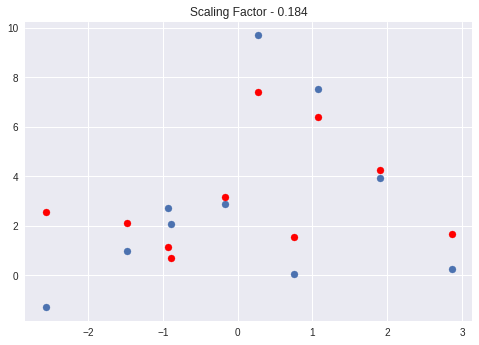

In [16]:
scalingfactor = 0.184
test_data=pd.read_csv('sample_data/1Test.csv')
X_test=test_data.x.values
Y_test = []
for point in X_test:
  pred = predict(X, Y, point, scalingfactor)
  Y_test.append(pred[0][0])
plt.title(f'Scaling Factor - {scalingfactor}')
plt.scatter(X_test,test_data.y.values )
plt.scatter(X_test, Y_test, color ='red')
predicted_values= []
original_values=[]
# print(X)
for i in range(X_test.shape[0]):
  predicted_values.append((X_test[i],Y_test[i][0][0]))
  original_values.append((X[i][0],Y[i][0]))
print(f'X & Original Y value {original_values}')
print(f'X & Y Predicted values {predicted_values}')
# print(Y_test)
plt.show()

Plotting regression for by training the given train data and testing the test data points

X & Original Y value [(-2.6815, 1.787894169), (-1.3655, 0.766491139), (0.0165, 9.733846149), (-1.2805, 1.276360078), (-0.8945, 1.966131296), (-1.141, 2.832099578), (1.7205, 2.915129924), (-1.971, 6.715732388), (-2.7995, 5.620945532), (-1.1015, 3.263186634)]
X & Y Predicted values [(1.898, matrix([[4.25054295]])), (1.0785, matrix([[6.3863526]])), (-1.477, matrix([[2.10179648]])), (-0.1645, matrix([[3.14982344]])), (-0.9375, matrix([[1.1585601]])), (0.2765, matrix([[7.41979718]])), (-2.5675, matrix([[2.55088016]])), (2.86, matrix([[1.64673884]])), (-0.891, matrix([[0.69242336]])), (0.7565, matrix([[1.56169795]]))]


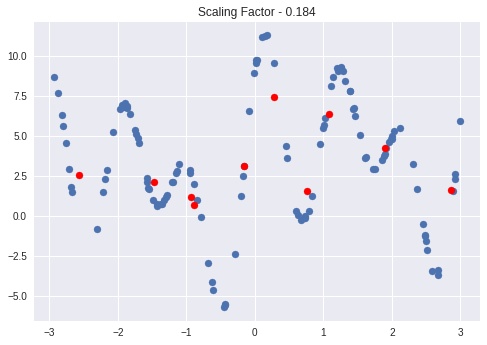

In [17]:
scalingfactor = 0.184
test_data=pd.read_csv('sample_data/1Test.csv')
X_test=test_data.x.values
Y_test = []
for point in X_test:
  pred = predict(X, Y, point, scalingfactor)
  Y_test.append(pred[0][0])
plt.title(f'Scaling Factor - {scalingfactor}')
plt.scatter(X,Y)
plt.scatter(X_test, Y_test, color ='red')
predicted_values= []
original_values=[]
# print(X)
for i in range(X_test.shape[0]):
  predicted_values.append((X_test[i],Y_test[i][0][0]))
  original_values.append((X[i][0],Y[i][0]))
print(f'X & Original Y value {original_values}')
print(f'X & Y Predicted values {predicted_values}')
# print(Y_test)
plt.show()

2d) Repeat the experiment and evaluation of part b) and c) using only the first 20 elements of the training
data set. How does the performance compare to the one for the results from Question 1 d) ? Why
might this be the case ?

X & Original Y value [(-2.6815, 1.787894169), (-1.3655, 0.766491139), (0.0165, 9.733846149), (-1.2805, 1.276360078), (-0.8945, 1.966131296), (-1.141, 2.832099578), (1.7205, 2.915129924), (-1.971, 6.715732388), (-2.7995, 5.620945532), (-1.1015, 3.263186634), (-2.6765, 1.517479428), (1.2365, 9.185758299), (-1.5585, 1.770106652), (2.366, 1.688940152), (2.5125, -2.155143081), (0.736, -0.001686006), (0.605, 0.276822875), (0.9545, 4.50411266), (-2.871, 7.659548548), (-1.942, 6.909927338)]
X & Y Predicted values [(-2.6815, matrix([[1.81214384]])), (-1.3655, matrix([[1.53473809]])), (0.0165, matrix([[9.7333946]])), (-1.2805, matrix([[1.76275899]])), (-0.8945, matrix([[2.20331277]])), (-1.141, matrix([[2.35302362]])), (1.7205, matrix([[2.94765917]])), (-1.971, matrix([[6.93553249]])), (-2.7995, matrix([[5.48858516]])), (-1.1015, matrix([[2.45977967]])), (-2.6765, matrix([[1.66493045]])), (1.2365, matrix([[8.39984651]])), (-1.5585, matrix([[2.42496576]])), (2.366, matrix([[1.5275437]])), (2.5125

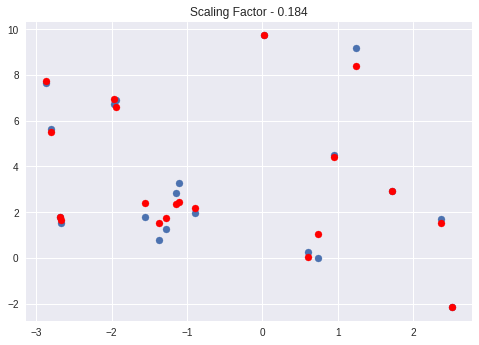

In [48]:
scalingfactor = 0.184
test_data=pd.read_csv('sample_data/1b.csv')
X_test=test_data.x.values[:20]
Y_test = []
for point in X_test:
  pred = predict(X[:20], Y[:20], point, scalingfactor)
  Y_test.append(pred[0][0])
plt.title(f'Scaling Factor - {scalingfactor}')
plt.scatter(X[:20],Y[:20])
plt.scatter(X_test[:20], Y_test[:20], color ='red')
predicted_values= []
original_values=[]
# print(X)
for i in range(X_test.shape[0]):
  predicted_values.append((X_test[i],Y_test[i][0][0]))
  original_values.append((X[i][0],Y[i][0]))
print(f'X & Original Y value {original_values}')
print(f'X & Y Predicted values {predicted_values}')
# print(Y_test)
plt.show()